# RNN층의 역전파

## 역전파 수식

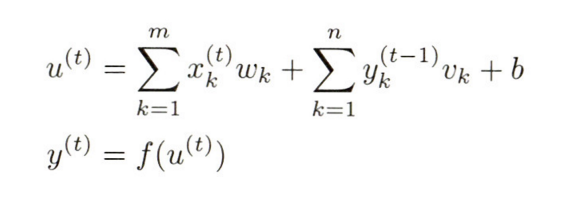

- 이 식에서 행렬 내의 위치를 표시하는 첨자는 생략되었다.
- 여기에서 입력에 곱하는 가중치 $w_i$의 기울기를 구한다. 
- 각 시점의 $u^{(t)}$를 이용해 연쇄 법칙을 적용한다.

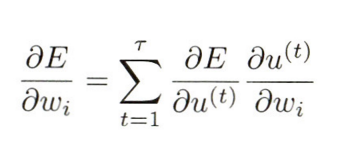

- 여기에서 $δ^{(t)}$는 다음과 같이 설정한다.

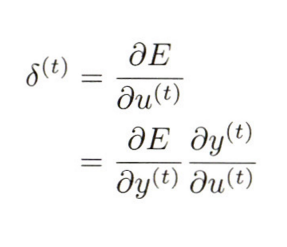

- 위 식에서 $∂E\over∂u^{(t)}$은 이전 시점의 출력층에서 시작된 전파로, $∂y^{(t)}\over∂u^{(t)}$은 활성화 함수를 편미분해서 구할 수 있다.
- 우변의 $∂u^{(t)}\over∂w_i$은 다음과 같이 구할 수 있다.

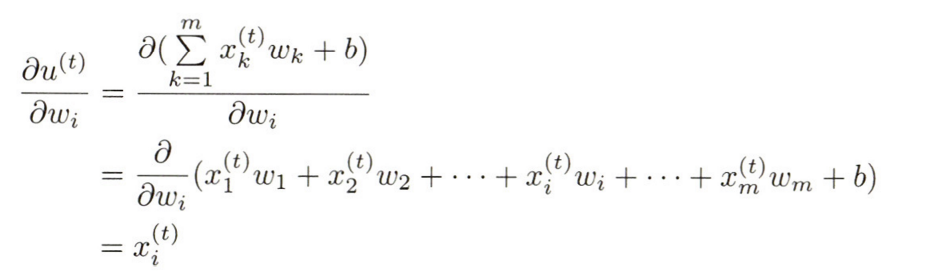

- 따라서 다음의 형태로 나타낼 수 있다.

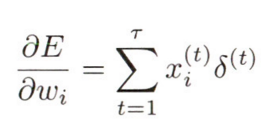

- 전결합층의 식과 다른 점이라면 모든 시점의 오차 기울기 합을 구한다는 점이다.
- 동일한 방법으로 이전 시점의 출력에 곱하는 가중치 기울기를 다음과 같이 구할 수 있다.

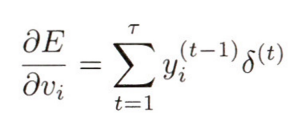

- 마찬가지 방법으로, 편향도 모든 시점의 합을 구하는 형태로 나타낼 수 있다.

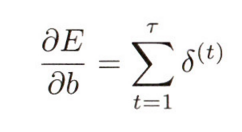

- 특점 시점에서 입력 $x^{(t)}_i$의 기울기는 각 뉴런의 $u^{(t)}_k$를 이용한 연쇄 법칙으로 구할 수 있다.

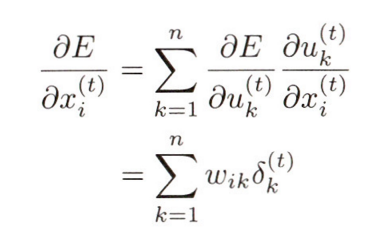

- RNN층 앞의 또 다른 층이 있을 때 그 층의 각 기울기를 구하는 데 사용한다.
- 이전 시점의 출력 기울기는 입력 기울기와 마찬가지로 다음과 같이 구할 수 있다.

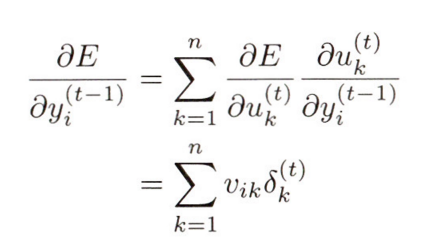

 - 이 값은 이전 시점으로 전파되고, 해당 시점의 출력 기울기로 사용한다.

## 역전파를 행렬로 표현
- 코드로 구현하기 쉽도록 역전파를 행렬로 정리해본다.
- 각 기울기를 행렬로 나타낸다.
- 입력에 곱하는 가중치 행렬 $W$의 기울기는 다음과 같이 전치와 행렬 곱셈으로 배치 내 총합을 구하고 모든 시점의 합으로 구할 수 있다.

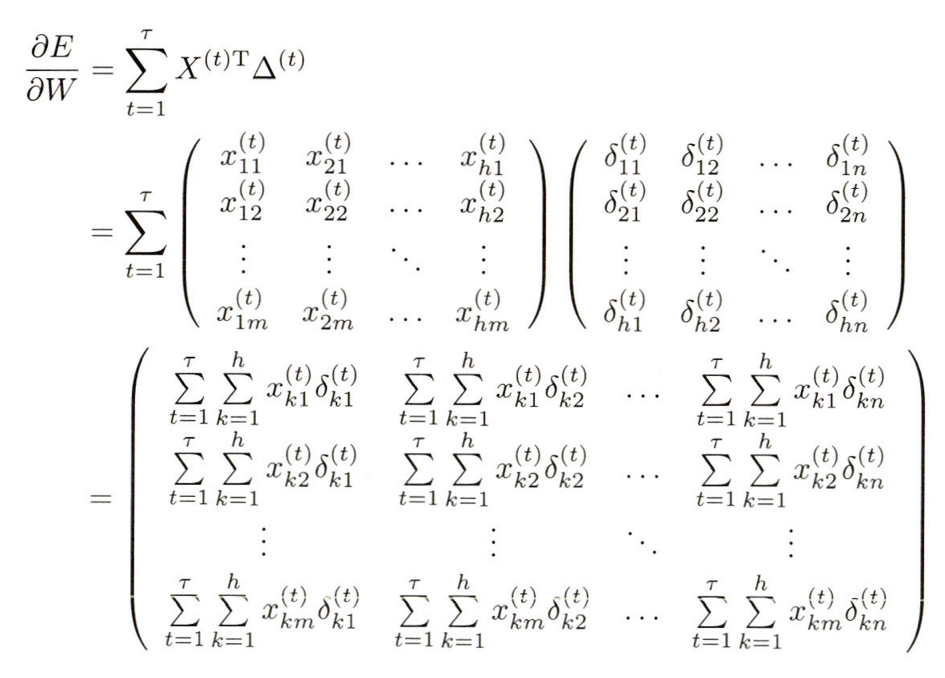

- $h$는 배치 사이즈이며, 행렬의 각 원소는 배치 내 모든 샘플과 모든 시점의 합
- 배치의 기울기는 각 샘플의 기울기 총합으로 구할 수 있다.
- 이전 시점의 출력에 곱하는 가중치 행렬 $V$의 기울기는 전치와 행렬 곱셈으로 배치 내에서의 총합을 구하고 이 값을 다시 모든 시점의 총합으로 구할 수 있다.

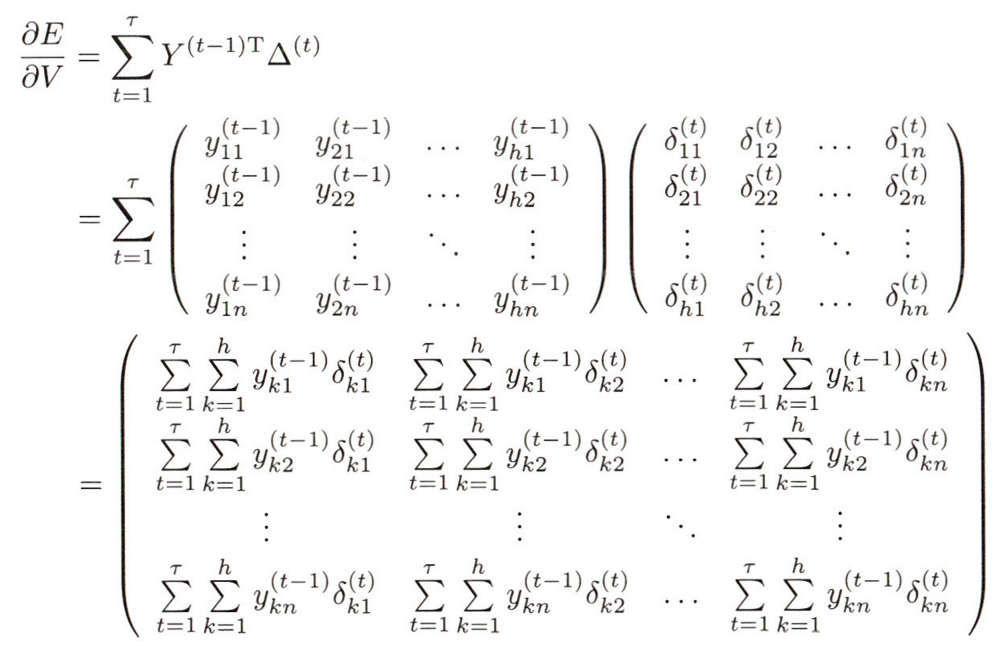

- 행렬의 각 원소는 배치 내에서 모든 시점의 합이라는 점을 확인.
- 편향의 기울기 δ를 배치 내의 모든 시점의 합으로 구할 수 있다.

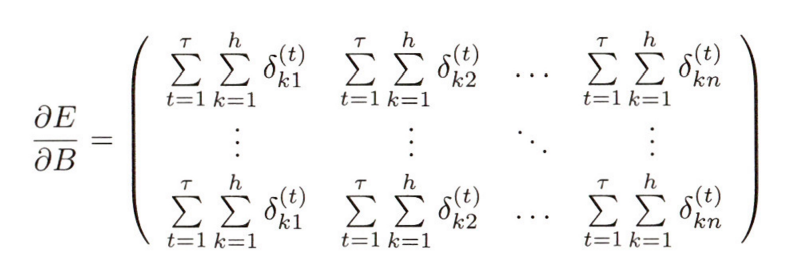

- 이 식과 같이 편향의 기울기는 행이 모든 같은 행렬이 된다.
- 입력 기울기는 각 입력 샘플별로 나타낸다.
- 입력 기울기는 $δ^{(t)}$의 행렬 $𝚫^{(t)}$와 전치한 $W$의 행렬 곱셈으로 한 번에 구할 수 있다.

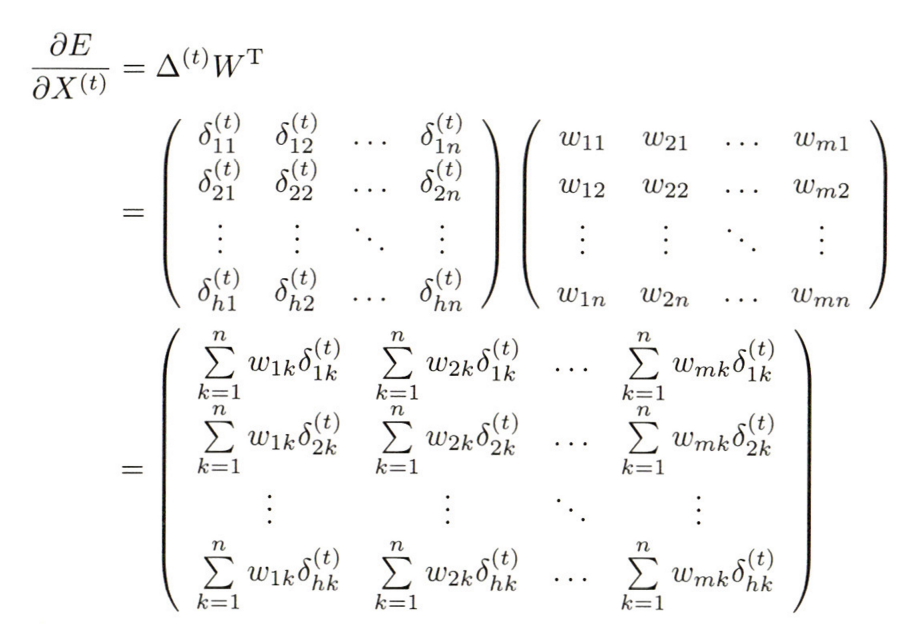

- 이전 시점의 출력 기울기를 각 입력 샘플별로 나타내면 $δ^{(t)}$의 행렬 $𝚫^{(t)}$와 전치한 $V$의 행렬 곱셈으로 한 번에 구할 수 있다.

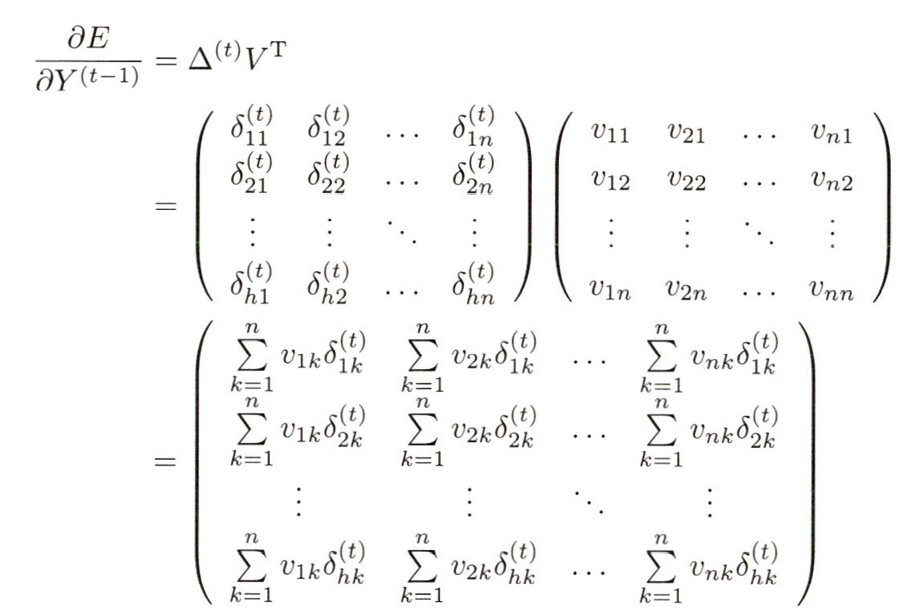

- 각 기울기를 계산하는 식을 행렬로 나타낼 수 있다.

## 역전파를 코드로 구현
- 각 기울기의 행렬을 다음의 수식으로 나타낼 수 있다.

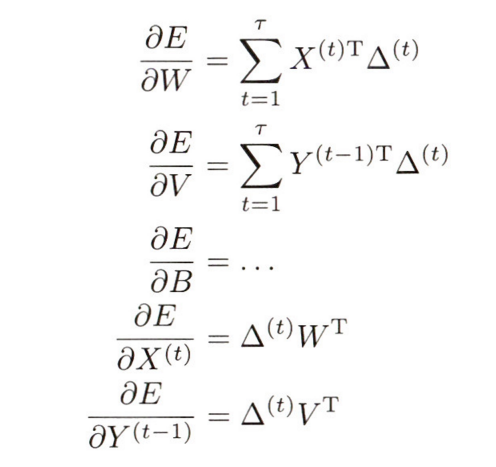

In [ ]:
# x:입력 w:가중치 y_prev:이전 시점의 출력 v:가중치 delta:δ의 행렬
grad_w += np.dot(x.T, delta)        # w의 기울기
grad_v += np.dot(y_prev.T, delta)   # v의 기울기
grad_b += np.sum(delta, axis=0)     # b의 기울기

grad_x = np.dot(delta, w.T)         # x의 기울기
grad_y_prev = np.dot(delta, v.T)    # y_prev의 기울기

- $W, V, B$의 기울기는 모든 시점의 총합이므로 누적 합계를 위해 += 연산자를 이용한다.
- $X^{(t)}$와 $Y^{(t-1)}$의 기울기는 모든 시점의 합을 구할 필요가 없기 때문에 = 연산자를 이용한다.